<a href="https://colab.research.google.com/github/m2skan/muskann/blob/main/Muskan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
data = {
    "Student ID": range(1,21),
    "AttendanceRate": [90,85,88,70,60,95,80,65,75,85,50,92,78,82,68,55,97,73,89,91],
    "StudyTime": [10,9,8,6,4,12,7,5,6,8,3,11,6,7,5,2,13,6,9,10],
    "FinalExamScore": [85,80,78,65,55,95,75,60,70,79,50,90,68,74,62,48,98,66,82,88],
}
df = pd.DataFrame(data)
df["Pass/Fail"] = (df["FinalExamScore"]>= 60).astype(int)
df.head()

,Student ID,AttendanceRate,StudyTime,FinalExamScore,Pass/Fail
0,1,90,10,85,1
1,2,85,9,80,1
2,3,88,8,78,1
3,4,70,6,65,1
4,5,60,4,55,0


Intercept: 38.05925250683684
Slope: 4.808264965056213
R² Score: 0.9818053164943936


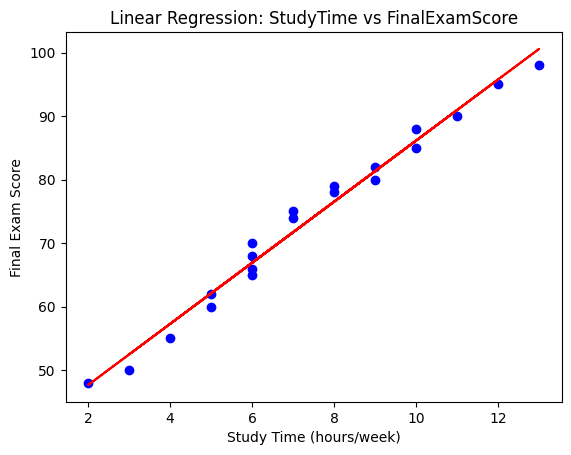

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

x = df[["StudyTime"]]
y = df["FinalExamScore"]
model_lr = LinearRegression().fit(x, y)
print("Intercept:",model_lr.intercept_)
print("Slope:", model_lr.coef_[0])
print("R² Score:",model_lr.score(x, y))

plt.scatter(df["StudyTime"],df["FinalExamScore"],color = 'blue')
plt.plot(df["StudyTime"],model_lr.predict(x), color = 'red')
plt.xlabel("Study Time (hours/week)")
plt.ylabel("Final Exam Score")
plt.title("Linear Regression: StudyTime vs FinalExamScore")
plt.show()


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

x_log = df[["StudyTime","AttendanceRate"]]
y_log = df["Pass/Fail"]
model_log = LogisticRegression().fit(x_log, y_log)
preds = model_log.predict(x_log)
print("Accuracy:", accuracy_score(y_log, preds))
print("Confusion Matrix:\n", confusion_matrix(y_log, preds))

print("Intercept:", model_log.intercept_)
print("Coefficients:", model_log.coef_)
example = pd.DataFrame([[7,85]], columns=["StudyTime","AttendanceRate"])
print("Example Prediction (7 hours, 85% attendance):", model_log.predict(example)[0])

Accuracy: 1.0
Confusion Matrix:
 [[ 3  0]
 [ 0 17]]
Intercept: [-47.39850499]
Coefficients: [[0.14368544 0.74907307]]
Example Prediction (7 hours, 85% attendance): 1


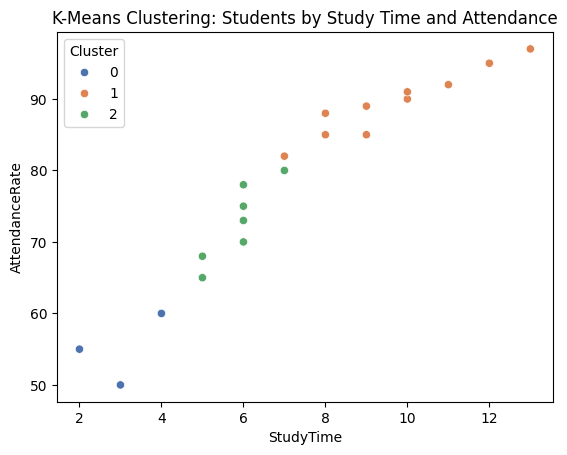

         StudyTime  AttendanceRate  FinalExamScore
Cluster                                           
0         3.000000       55.000000       51.000000
1         9.700000       89.400000       84.900000
2         5.857143       72.714286       66.571429


In [8]:
from sklearn.cluster import KMeans
import seaborn as sns
x_kmeans = df[["StudyTime","AttendanceRate"]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_kmeans)
df["Cluster"] = kmeans.labels_

sns.scatterplot(data=df, x="StudyTime",y="AttendanceRate",hue="Cluster",palette="deep")
plt.title("K-Means Clustering: Students by Study Time and Attendance")
plt.show()
print(df.groupby("Cluster")[["StudyTime","AttendanceRate","FinalExamScore"]].mean())

In [9]:
df.to_csv("student_results_with_clusters.csv",index=False)